# The toru puzzle: more eyes make it better

I want to make this puzzle available for all, but I cannot seem to convince anyone with manufacturing capacity to even discuss the possibility. So, if I cannot make the physical puzzle available I certainly open up the design pedagogy and maybe somebody else will run with it.

Thus, this project consists of two parts:

1. Defining the geometry of the cuts needed for this puzzle in a generic sense, independent of puzzle size.
2. Incorporating parabolic cuts on the outer geometry in order to achieve a broader range of exterior patterns than is possible with linear or spherical cutting planes.

I hope this can help give others some ideas to work with and expand on.

## the 95 trace

We define an edge-turning puzzle here in the following manner. Consider a sphere of radius $R$ embedded inside a rhombic dodecahedron. We vary the distance between two parallel faces from $2R$ to $0$ and look at the traces on the sphere which in turn define the pieces of a puzzle that would result by embedding the sphere into some other shape which corresponds to the shape of our puzzle.

For the original toru puzzle, the outer shape is also a rhombic dodecahedron with face-to-face distance $D > 2R$.

Fundamentally, this puzzle is based on the parts-pattern that emerges when we embed a rhombic dodecahedron inside a sphere and trace the intersection of the planes defined by the faces onto the sphere, which is what [jaap's sphere applet does](https://www.jaapsch.net/puzzles/sphere.htm):

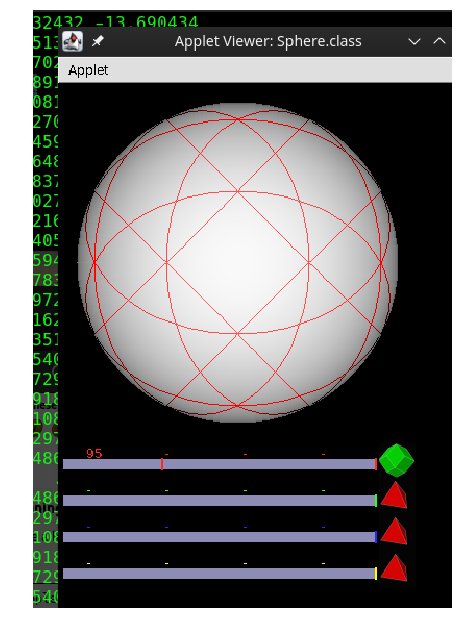

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys

from PIL import Image

code_path = os.path.abspath(os.path.join('code'))
if code_path not in sys.path:
    sys.path.append(code_path)
    
fig, ax = plt.subplots(figsize=(9, 11))
ax.imshow(Image.open('img/95_trace.png'), aspect='equal')
ax.axis('off')

plt.show()

The tricky part, however, is working out what the actual geometry is because "95" doesn't translate particularly well into a solid modeling platform, and eyeballing things is generally an awful idea.

Thus, what we wish to do here is parametrically solve what the "95" value should be in terms of some value that relates to a rhombic dodecahedron inside a sphere. A natural choice is the angle $\theta$ that defines a cone originating at the centroid of the sphere, since the intersection of the cone and the sphere will be a circle of radius $r$ traced onto the sphere:

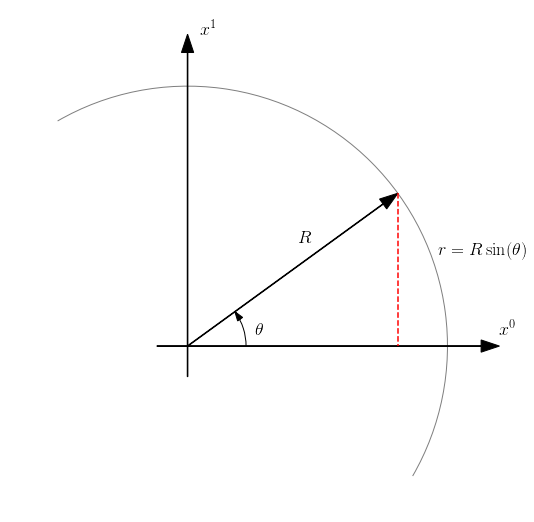

In [2]:
from basic_trace import parameter_trace
parameter_trace()

allowing us to find the trace in coordinates via something like:

$$
f\left(\theta, \varphi\right) =
    R \left(\begin{array}{l}
        \cos\left(\theta\right)\\
        \sin\left(\theta\right)\cos\left(\varphi\right)\\
        \sin\left(\theta\right)\sin\left(\varphi\right)\\
        \end{array}\right),\,\,\,\theta\in\left[0,\frac{\pi}{2}\right), \varphi\in\left[ 0,2\pi\right)
$$

It should be clear here that if $\theta=0$ then the trace intersects the sphere at a single point only, and if $\theta=\pi/2$ then we end up with a so-called deep-cut slice.

To use this concept with our rhombic dodecahedron (or any other geometry for that matter) we simply pattern the traces onto the sphere, which we can do by simply patterning the construct around the sphere as appropriate using simple (affine) transformations of $f$.

To avoid needlessly cumbersome notations, we will consider only two faces of our rhombic dodecahedron, and we will in turn define these faces in terms of a plane normal to the axis of rotation. Defining these axis as a line segment passing through the centroid of our sphere and the midpoint of an edge of some cubic hexahedron with faces perpendicular to our $\left(x^0,x^1,x^2\right)$ frame above, chose the axis going through (red) edges $A$ and $B$:

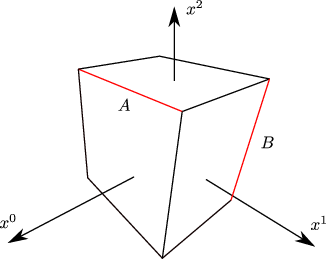

In [3]:
from wand.image import Image as WandImage
WandImage(filename='img/cube_edges.pdf')

Without loss of generality let $R=1$. To get the trace of the plane corresponding to the "edge $A$" axis we simply transform $f$ as:

$$
f_A = \left. T_A f \right\rvert_{\varphi=\varphi_A}
$$

Where

$$
\begin{align}
    T_A &= \left. \left(\begin{array}{ccc}
         \cos\nu & 0 & \sin\nu\\
               0 & 1 &       0\\
        -\sin\nu & 0 & \cos\nu
        \end{array}\right)\right\rvert_{\nu=-\pi / 4}\\
    \\
    \Rightarrow f_A\left(\theta, \varphi_A\right) &=
        \left(\begin{array}{r}
        -\frac{\sqrt{2}}{2}\left(\sin\theta\sin\varphi_A - \cos\theta\right)\\
        \sin\theta\cos\varphi_A\\
        \frac{\sqrt{2}}{2}\left(\sin\theta\sin\varphi_A + \cos\theta\right)\\
    \end{array}\right)
\end{align}
$$

That is, a rotation of $-\pi/4$ about the $x^1$ axis, and we have freed up the $\varphi$ parameter so it is not locked to the original parameter.  Similarly, we have:

$$
\begin{align}
    f_B &= \left. \left(\begin{array}{ccc}
         \cos\nu & \sin\nu & 0\\
        -\sin\nu & \cos\nu & 0\\
               0 &       0 & 1
        \end{array}\right) f \,\right\rvert_{\nu=3\pi / 4, \,\,\varphi=\varphi_B}\\
    \\
    &=
        \left(\begin{array}{r}
        -\frac{\sqrt{2}}{2}\left(\sin\theta\cos\varphi_B + \cos\theta\right)\\
        -\frac{\sqrt{2}}{2}\left(\sin\theta\cos\varphi_B - \cos\theta\right)\\
        \sin\theta\sin\varphi_B
    \end{array}\right)
\end{align}
$$

To find the value of $\theta$ that gives the traces corresponding to the desired "95" cuts, we simply solve for the case that $f_A = f_B$ and $f_A^2 = f_B^2 = 0\Rightarrow \varphi_B = \pi$. We simply brute-force our way to a solution:

$$
\begin{align}
    \frac{\sqrt{2}}{2}\left(\sin\theta\sin\varphi_A - \cos\theta\right) &= \frac{\sqrt{2}}{2}\left(\sin\theta + \cos\theta\right)\\
    \sin\theta\left(\sin\varphi_A - 1\right) - 2\cos\theta &= 0\\
    \tan\theta &= \frac{2}{\sin\varphi_A - 1}
\end{align}
$$

so that

$$
\begin{align}
    \frac{\sqrt{2}}{2}\left(\sin\theta\sin\varphi_A + \cos\theta\right) &= 0\\
    \tan\theta\sin\varphi_A + 1 &= 0\\
    \frac{2\sin\varphi_A}{\sin\varphi_A - 1} &= -1\\
    \varphi_A &= \text{arcsin}\frac{1}{3}\\
    \Rightarrow \tan\theta &= 3
\end{align}
$$

which now gives us the ability to trace out the cut pattern for the toru puzzle independent of $R$. In particular, the following should provide a bit of a road-map for creating the (outer) mechanism in SolidWorks. Note that the poor technique is intentional for the sake of illustration:

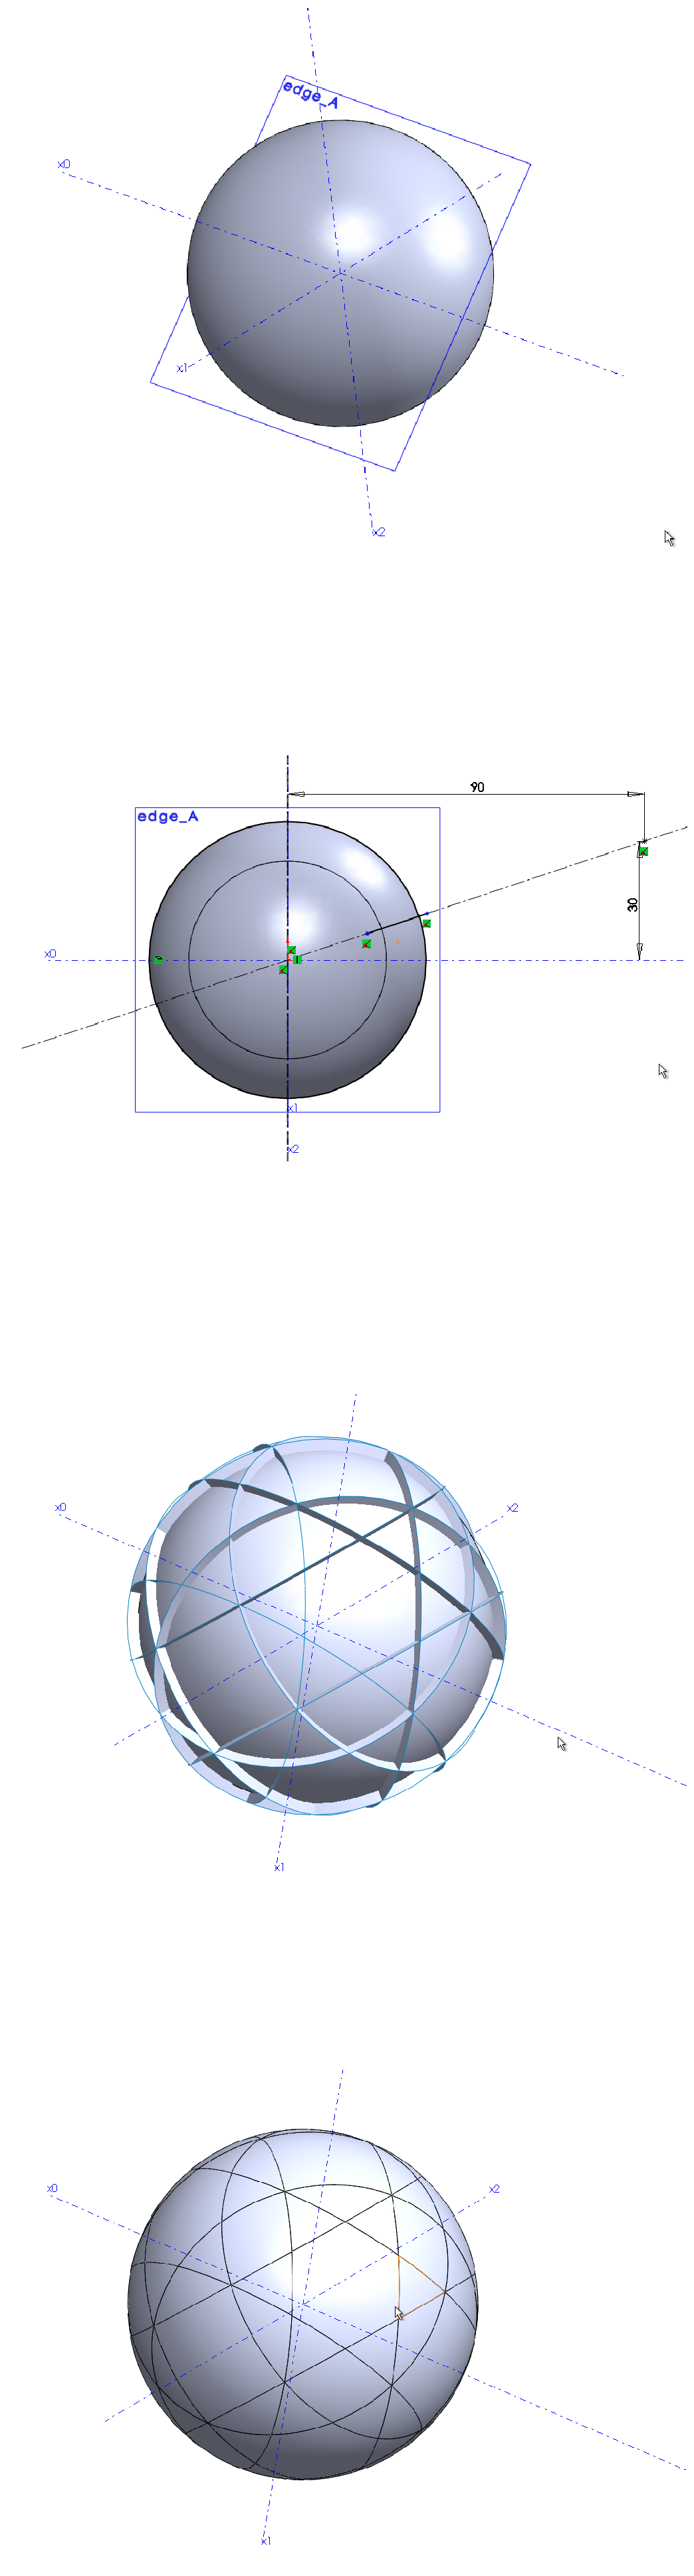

In [4]:
fig, ax = plt.subplots(4, 1, figsize=(18, 72))
ax[0].imshow(Image.open('img/00_sphere_and_edge_a.png'), aspect='equal')
ax[1].imshow(Image.open('img/01_the_95_slice.png'), aspect='equal')
ax[2].imshow(Image.open('img/02_pattern_exaggerated_cuts.png'), aspect='equal')
ax[3].imshow(Image.open('img/03_split_solid.png'), aspect='equal')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')

plt.show()

Of course, one would need to have added a tab to the slice in order to create a mechanism as well as create the inner layer to keep things together, but that is all basic puzzle design stuff and not in the scope of this project.

Now, let's make something more interesting

## making the puzzle cubic

The problem with this cut pattern arises when we try to extend it out to a cubic exterior shape, as some tiny extra pieces appear that are both unstable and ugly. For example, if we embed the above sphere into a cube with edge length equal to the diameter of the sphere and faces whose normals line up with our $\left(x^0, x^1, x^2\right)$ frame, we end up with a face pattern of:

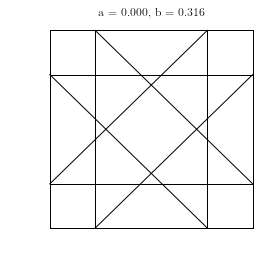

In [5]:
from parabolic_cuts import RhomDoCuts

t = np.arctan(3)
b = np.cos(t)

RhomDoCuts(0, b, R=2).plot_cuts(pts=2)

Which, aside from the tiny pieces around the central square being unstable, the proportions look all wrong as well--note now much larger the central square is in relation to the corners, and even worse the edge pieces. Such a hodge-podge mix of big and small.  Yuck.

So what can we do about this?

### option 1: fiddle with external geometry

The first option is to adjust the size of the cube relative to the sphere, givng the effect of moving the outer cuts around, but there is really only one truly nice option if one takes this route, and that is to create [Drewseph's Quad-X](http://twistypuzzles.com/~sandy/forum/viewtopic.php?f=15&t=18538) (a very fine design mind you, but the only really nice option available is all):

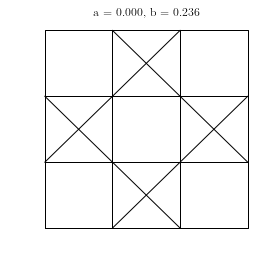

In [6]:
RhomDoCuts(0, np.sqrt(2) / 6).plot_cuts(pts=2)

Also, keep in mind that with this design we are actually adding an additional piece here by moving the sphere further past the cube, the payoff of course being that we get enough real-estate in the process to make the extra parts stable in addition to making an aesthetically pleasing face pattern.

A less-nice option (still leaves the scale issues in play) is to make the sphere only slightly smaller than the cube, to the point where we can make the small triangles vanish:

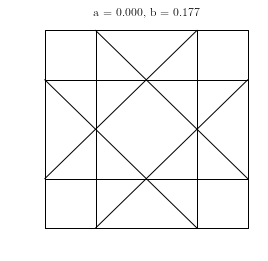

In [7]:
RhomDoCuts(0, np.sqrt(2) / 8).plot_cuts(pts=2)

This is still ugly though, owing to the size disparity between all the different pieces.

Clearly then, if we want to add some flexibility to the design, we need to add some extra design parameters to the process.

### option 2: curved slices

Using spherical slices on an edge-turning puzzle is a well-established technique for opening up the design space, as has been demonstrated by [TomZ's Curvy Copter](http://www.mefferts.com/products/details.php?lang=en&category=13&id=483) and it's variants.

The reason this works is that by adding the more complicated surface, we go from having only one parameter to work with (the depth of the cut) to having two, say the depth of the cut and the point where the cut divides an edge.

We are going to go one step further here and introduce a third parameter by using a parabolic profile, enabling us to set, say, the cut depth, the edge division, and control the part-size distribution on a face.

To do this, we define a parabola by:

$$
g\left(t\right) = at^2 + b, \,\, t, a \geqslant 0
$$

and we revolve the graph of this function about the axis $t=0$ in order to define a sheet as:

$$
f\left(x\right) = \left(\begin{array}{c}
    x^0\\
    x^1\\
    a \left({x^0}^2 + {x^1}^2) + b\right)
    \end{array}\right)
$$

By making the $x^2$ axis in the above coincident with our turning axis, we have parabolic cuts, and the ability to explore more options for design candidates. A convenience class has been provided here to explore how various parameters affect the observed part pattern on a face; the parameter `R` defines the edge-length (default `R=1`) while `a` and `b` are purely numeric so must be computed relative to `R`:

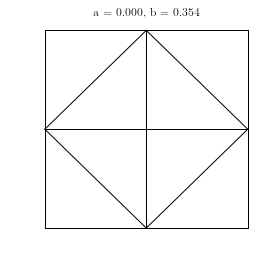

In [8]:
# basic helicopter cube:
RhomDoCuts(a=0, b=np.sqrt(2)/4).plot_cuts(pts=2)

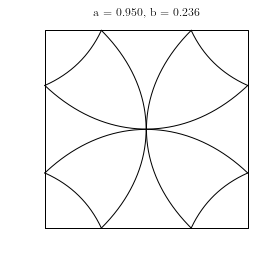

In [9]:
# something close to a curvy-copter
RhomDoCuts(a=0.95, b=np.sqrt(2)/6).plot_cuts()

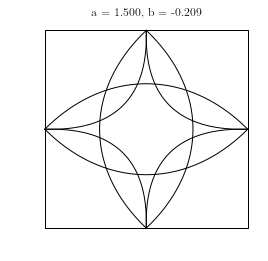

In [10]:
# make use of toru-cube parts; http://twistypuzzles.com/cgi-bin/puzzle.cgi?pkey=4247
a = 1.5
b = (4 * np.sqrt(2) - 6 * a) / 16
RhomDoCuts(a, b).plot_cuts()

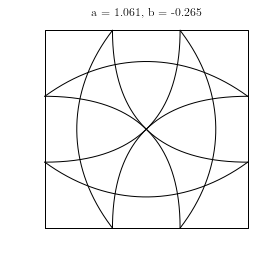

In [11]:
# fiddling around leads to strange new possibilities
a = 3 * np.sqrt(2)  / 4
b = (6 * np.sqrt(2) - 17 * a) / 36
RhomDoCuts(a, b).plot_cuts()

All well and good, and hopefully useful to somebody; I have already made use of this tool by using it to figure out a way to achieve:

* the toru puzzle in cubic form, 81mm edge length (bigger is more stable)
* no deleted pieces
* no extra pieces
* proportionally sized pieces (no huge-little disparity) via each edge being split into three equally spaced segments

via:

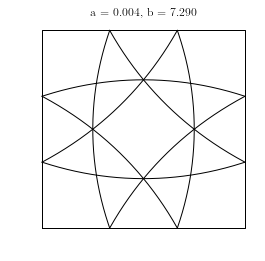

In [12]:
from find_intersect import FindParabolaDimension

R = 81
finder = FindParabolaDimension(R)

a, b = finder.solve_ab()
RhomDoCuts(a, b, R=R).plot_cuts()

I think it looks rather nice, so a rough prototype is being printed now in fact.